# Loading Packages

In [74]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Data
For this problem, we have been given three CSV files: train, test, and sample submission.

# Reading Data

In [129]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

# Understanding the Data

In [76]:
train.shape


(614, 13)

In [77]:

test.shape

(367, 12)

In [78]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [80]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Looking for Relations

<Axes: >

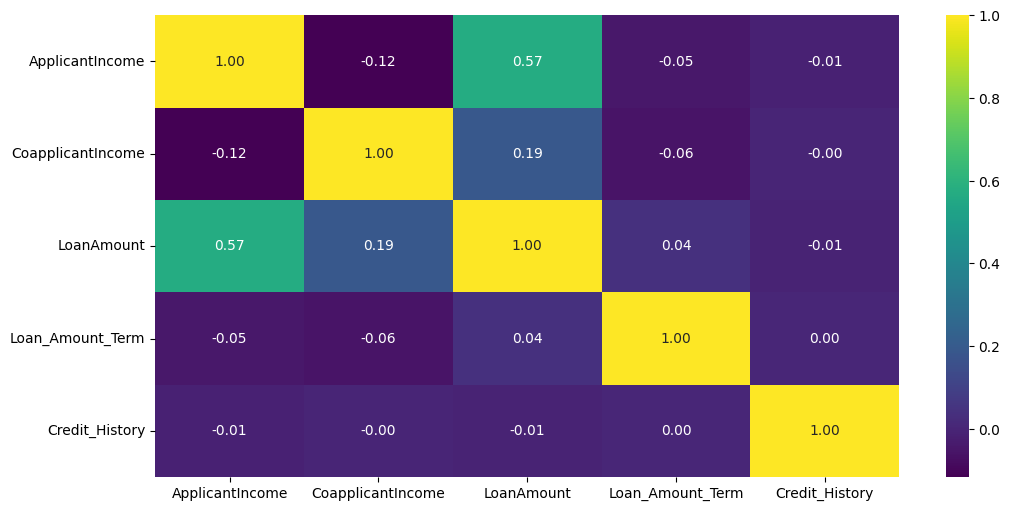

In [82]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), cmap='viridis', annot=True, fmt='.2f')

In [83]:
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})

<Axes: >

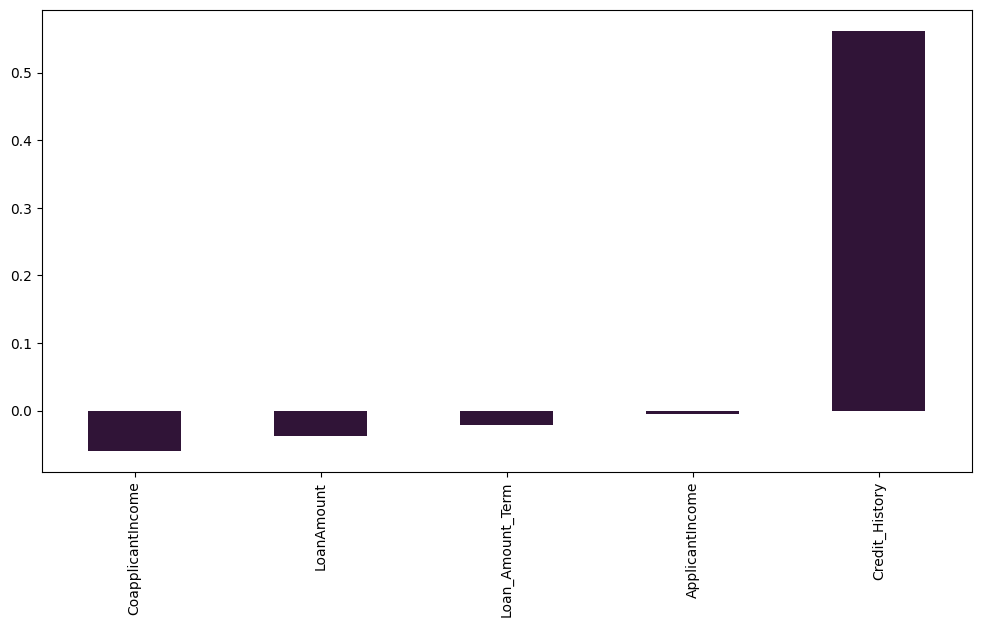

In [84]:
plt.figure(figsize = (12,6))
train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted')

# Exploratory Data Analysis

## Independent Variable (Categorical)

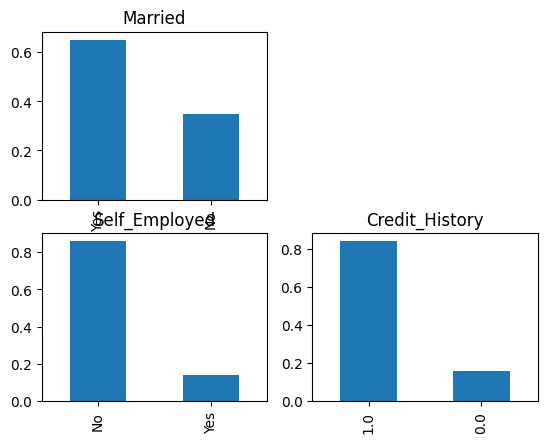

In [85]:
plt.subplot(221)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

### It can be inferred from the above bar plots that:

Around 65% of the applicants in the dataset are married.
About 15% of applicants in the dataset are self-employed.
About 85% of applicants have repaid their debts.
Now let’s visualize the ordinal variables.

## Independent Variable (Ordinal)

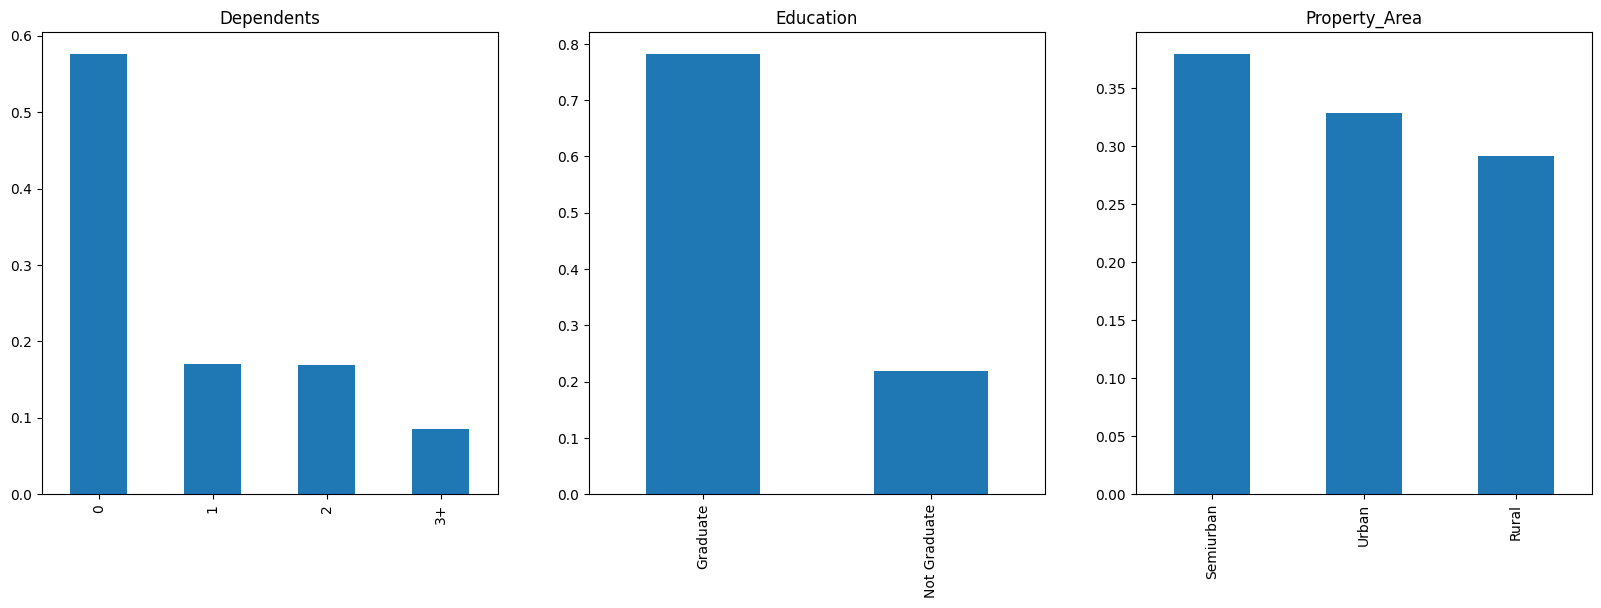

In [86]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

### Following inferences can be made from the above bar plots:

Most of the applicants don’t have dependents.
About 80% of the applicants are graduates.
Most of the applicants are from semi-urban areas.

## Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

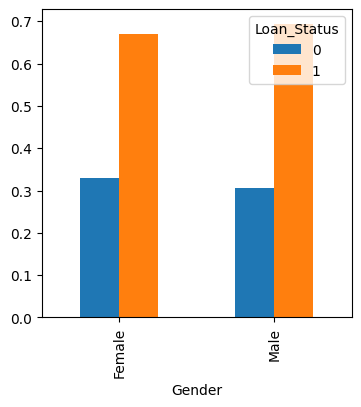

In [87]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

### Now let us visualize the remaining categorical variables vs the target variables.

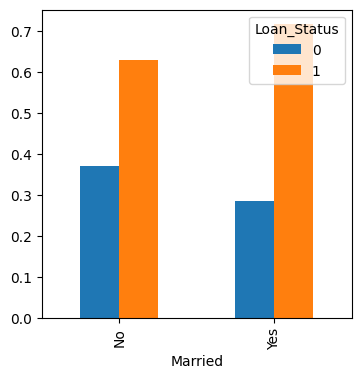

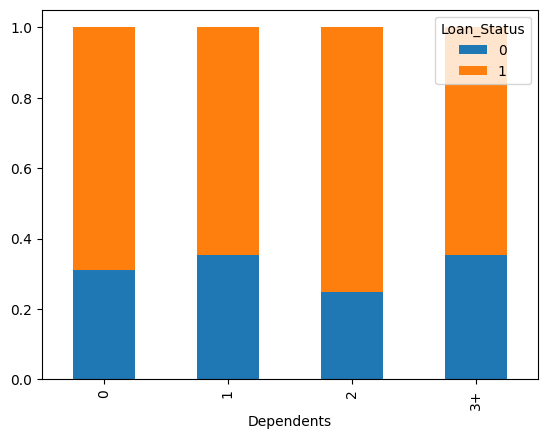

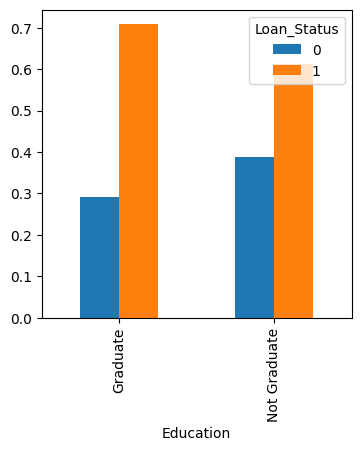

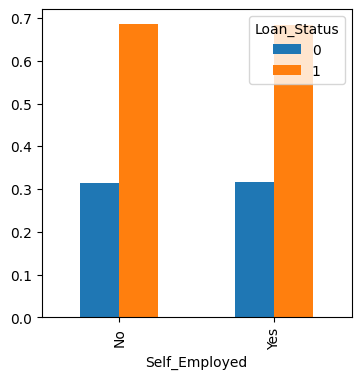

In [88]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

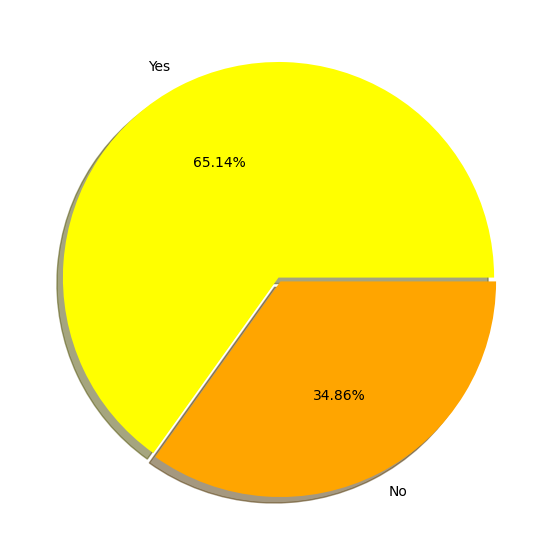

In [89]:
size = train['Married'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

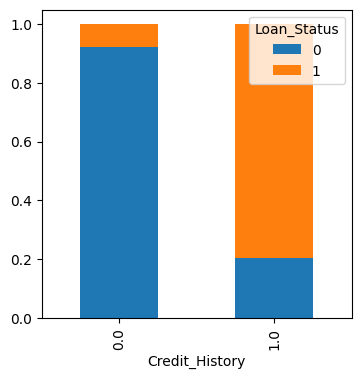

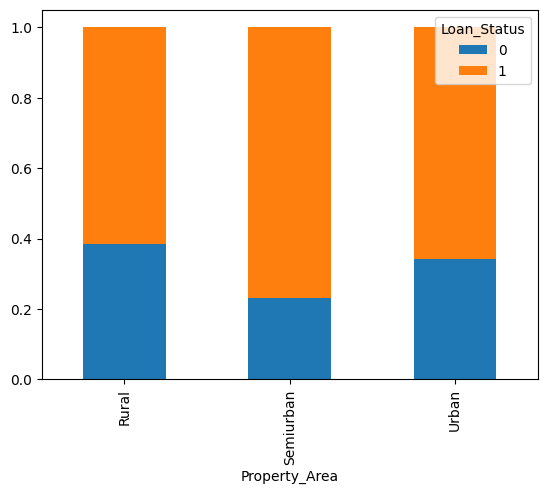

In [90]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [130]:
gender = train[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.697248
Male,149.265957


In [131]:
Education = train[['Education', 'LoanAmount']].groupby("Education").mean()
Education = pd.DataFrame(Education)
Education

,LoanAmount
Education,
Graduate,154.060215
Not Graduate,118.409449


In [132]:
#Looking for null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

In [133]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Since Loan_ID is needed for sample_submission hence I am replacing 'LP00' with empty string.

In [134]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

### Counting the values for categorical columns

In [135]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [136]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [137]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [138]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [139]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

## Dealing with the missing data

In [140]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])


In [141]:
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [142]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [143]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Changing the datatypes of certain columns

In [144]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [145]:
# Removing the '+' sign from Dependents column
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [146]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

## Imputing categorical columns

In [147]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [148]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})

### Creating dummy variables for Property column

In [149]:
property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

## Scaling the data

In [150]:
scaler = StandardScaler()
train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))

In [151]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [152]:
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

## Splitting the data

In [153]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test

In [154]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## Building Models

In [155]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]


In [160]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.6972972972972973
RandomForestClassifier  0.7837837837837838
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838


### Here i am selecting LogisticRegresssion, SVC and RandomForestClassifier  for Hyperparameter Tuning based the accuracy scores

# Hyperparameter Tuning

In [161]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },

    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },

}

In [162]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [163]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(C=0.9, max_iter=2100, penal..."
1,SVC,0.820487,"SVC(C=0.9, kernel='linear')"
2,RandomForestClassifier,0.820487,"(DecisionTreeClassifier(max_depth=3, max_featu..."


### LogisticRegression is giving the the best accuracy

In [199]:
final['estimator'].iloc[0]

LogisticRegression(C=0.9, max_iter=2100, penalty='l1', solver='liblinear')

In [165]:
final['estimator'].iloc[1]

SVC(C=0.9, kernel='linear')

In [210]:
final['estimator'].iloc[2]

RandomForestClassifier(max_depth=3, max_features='auto', min_samples_split=8,
                       n_estimators=2100)

In [200]:
# Using the best parameters of LogisticRegression for building the final model

classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [169]:
# Using the best parameters of SVC Classifier for building the final model

svcclassifier = SVC(kernel='linear')
svcclassifier.fit(X_train, y_train)
svcprediction = svcclassifier.predict(X_val)

In [211]:
# Using the best parameters of RandomForestClassifier for building the final model

rclassifier = RandomForestClassifier(max_depth=3, max_features='auto', min_samples_split=8,
                       n_estimators=2100)
rclassifier.fit(X_train, y_train)
rprediction = rclassifier.predict(X_val)

In [203]:
# Predicting the test data(Logistic Regression)

pred = classifier.predict(X_test)

In [172]:
# Predicting the test data(SVC Classifier)

svcpred = svcclassifier.predict(X_test)

In [215]:
# Predicting the test data(Random Forest classifier)
rpred = rclassifier.predict(X_test)

## Making the final submission

### LogisticRegression

In [204]:
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [205]:
submission['Loan_Status'] = pred
submission.to_csv('sample_submission.csv', index=False)

In [206]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [207]:
submission.to_csv('sample_submission.csv', index=False)

## Test Score: 0.77

### SVC Classifier

In [193]:
test_df_svc = pd.read_csv('/content/test_lAUu6dG.csv')
submission_svc = pd.read_csv('/content/sample_submission_49d68Cx.csv')

submission_svc['Loan_ID'] = test_df_svc['Loan_ID']

In [194]:
submission_svc['Loan_Status'] = svcpred
submission_svc.to_csv('sample_submission_svc.csv', index=False)

## Test Score: 0.77

## RandomForest Classifier

In [213]:
test_df_r = pd.read_csv('/content/test_lAUu6dG.csv')
submission_r = pd.read_csv('/content/sample_submission_49d68Cx.csv')

submission_r['Loan_ID'] = test_df_r['Loan_ID']

In [214]:
submission_r['Loan_Status'] = rpred
submission_r.to_csv('sample_submission_r.csv', index=False)

## Test Score: 0.77